In [75]:
#Importing the libraries
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
dataset =pd.read_csv("C:/Users/Rahul/Downloads/Covid19/covid19_Confirmed_dataset.csv")
dataset.head

<bound method NDFrame.head of     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/

In [77]:
#dropping irrelevant columns 
dataset = dataset.drop(['Lat','Long','Province/State'],axis = 1)

In [78]:
dataset.shape

(266, 101)

In [79]:
aggregated_df = dataset.groupby('Country/Region').sum()
aggregated_df.head

<bound method NDFrame.head of                     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0    

In [80]:
aggregated_df.shape

(187, 100)

In [81]:
#Going with the  visualizations
#The loc attribute of DataFrame object allows the return of specified rows and/or columns from that DataFrame
aggregated_df.loc['China'] 

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

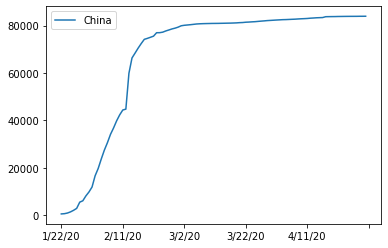

In [82]:
aggregated_df.loc['China'].plot() # Plotting a line chart for cases vs date
plt.legend()

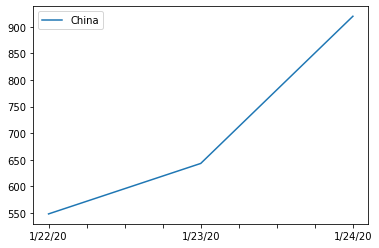

In [83]:
# Accessing the data for the first 3 days
aggregated_df.loc['China'][:3].plot()
plt.legend()

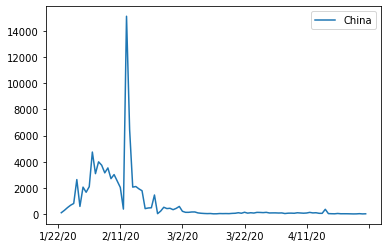

In [84]:
aggregated_df.loc['China'].diff().plot()
plt.legend()

In [85]:
# Finding the maximum rate of the cases increase, or the first derivative using the diff() method
aggregated_df.loc['China'].diff()

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
4/26/20      3.0
4/27/20      6.0
4/28/20     22.0
4/29/20      4.0
4/30/20     12.0
Name: China, Length: 100, dtype: float64

In [86]:
aggregated_df.loc['China'].diff().max() # Finding the max rate of increase in cases

15136.0

In [92]:
# Doing this for other countries as well and storing them in column in the dataset
#Making two lists one for countries and an (empty) list which would have the max infection rate for the corresponding country
countries = aggregated_df.index.to_list()
max_infection_rates = []

#Populating the column
for c in countries:
    max_infection_rates.append(aggregated_df.loc[c].diff().max())
aggregated_df['Max_Infection_Rates'] = max_infection_rates


In [95]:
aggregated_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [106]:
#Making a new dataframe with only the required column 
corona_rates = pd.DataFrame(aggregated_df['Max_Infection_Rates'])
corona_rates

,Max_Infection_Rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [121]:
#importing another csv file 
df2 = pd.read_csv("C:/Users/Rahul/Downloads/Covid19/worldwide_happiness_report.csv")
df2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [122]:
#dropping the irrelevant columns
coll = ['Generosity', 'Perceptions of corruption', 'Overall rank']
df2.drop(coll, axis =1, inplace = True)

In [123]:
df2.head

<bound method NDFrame.head of             Country or region  Score  GDP per capita  Social support  \
0                     Finland  7.769           1.340           1.587   
1                     Denmark  7.600           1.383           1.573   
2                      Norway  7.554           1.488           1.582   
3                     Iceland  7.494           1.380           1.624   
4                 Netherlands  7.488           1.396           1.522   
..                        ...    ...             ...             ...   
151                    Rwanda  3.334           0.359           0.711   
152                  Tanzania  3.231           0.476           0.885   
153               Afghanistan  3.203           0.350           0.517   
154  Central African Republic  3.083           0.026           0.000   
155               South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  
0                      0.986                

In [124]:
df2.set_index('Country or region', inplace = True)
df2.head

<bound method NDFrame.head of                           Score  GDP per capita  Social support  \
Country or region                                                 
Finland                   7.769           1.340           1.587   
Denmark                   7.600           1.383           1.573   
Norway                    7.554           1.488           1.582   
Iceland                   7.494           1.380           1.624   
Netherlands               7.488           1.396           1.522   
...                         ...             ...             ...   
Rwanda                    3.334           0.359           0.711   
Tanzania                  3.231           0.476           0.885   
Afghanistan               3.203           0.350           0.517   
Central African Republic  3.083           0.026           0.000   
South Sudan               2.853           0.306           0.575   

                          Healthy life expectancy  \
Country or region                            

In [125]:
corona_rates.shape

(187, 1)

In [126]:
df2.shape

(156, 5)

In [127]:
#With the dataset prepared, joining the two datasets
data = corona_rates.join(df2, how = "inner")
data

,Max_Infection_Rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000
Albania,34.0,4.719,0.947,0.848,0.874,0.383
Algeria,199.0,5.211,1.002,1.160,0.785,0.086
Argentina,291.0,6.086,1.092,1.432,0.881,0.471
Armenia,134.0,4.559,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,29.0,4.707,0.960,1.427,0.805,0.154
Vietnam,19.0,5.175,0.741,1.346,0.851,0.543
Yemen,5.0,3.380,0.287,1.163,0.463,0.143
Zambia,9.0,4.107,0.578,1.058,0.426,0.431


In [128]:
#making a correlation matrix 
data.corr()

,Max_Infection_Rates,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_Rates,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_Rates'>

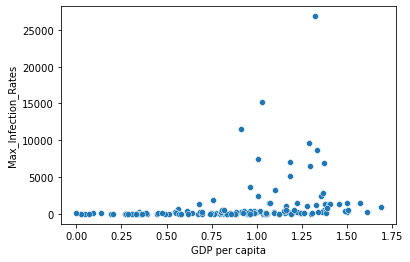

In [133]:
#Visualizations
x = data['GDP per capita']
y = data['Max_Infection_Rates']
sns.scatterplot(x,y) #showing less correlation between GDP per capita and Max_Infection_Rates

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_Rates'>

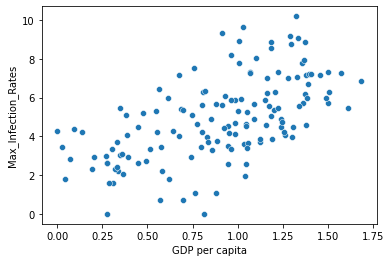

In [134]:
# the scales seem to be mismatched, y axis in thousands and x axis in decimals
sns.scatterplot(x,np.log(y))

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_Rates'>

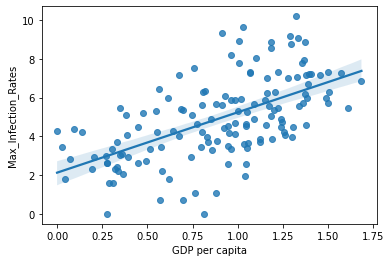

In [135]:
sns.regplot(x,np.log(y)) #regression plot

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='Max_Infection_Rates'>

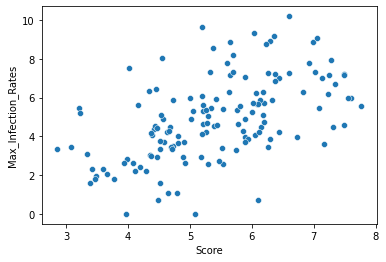

In [137]:
x = data['Score']
y = data['Max_Infection_Rates']
sns.scatterplot(x,np.log(y))

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='Max_Infection_Rates'>

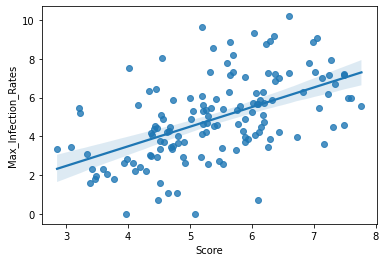

In [138]:
sns.regplot(x,np.log(y)) #regression plot

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_Infection_Rates'>

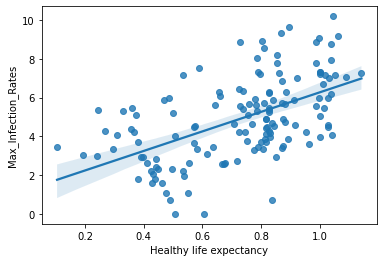

In [140]:
x = data['Healthy life expectancy']
y = data['Max_Infection_Rates']
sns.regplot(x,np.log(y))

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_Rates'>

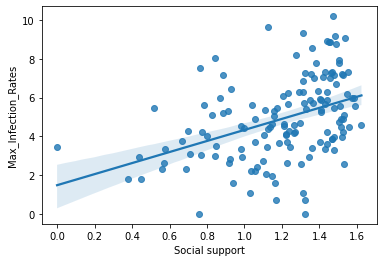

In [141]:
x = data['Social support']
y = data['Max_Infection_Rates']
sns.regplot(x,np.log(y))